In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


      date  confirmed  deaths  recovered
 2020-4-10       2473      33       1013
new  confirmed
      50.0


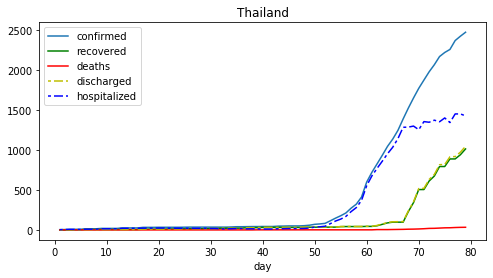

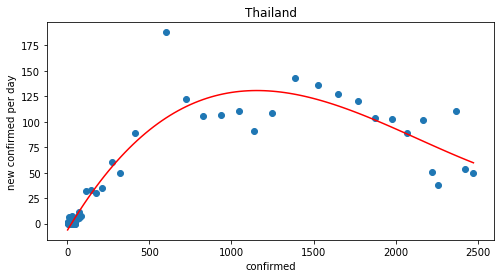

discharged:  1046
deaths:  33
%:  3.154875717017208


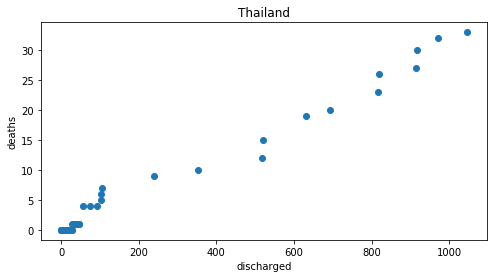

      date  confirmed  deaths  recovered
 2020-4-10       2108       7        492
new  confirmed
     198.0


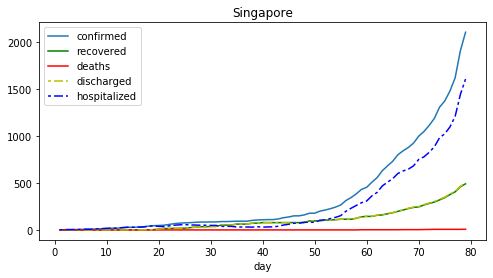

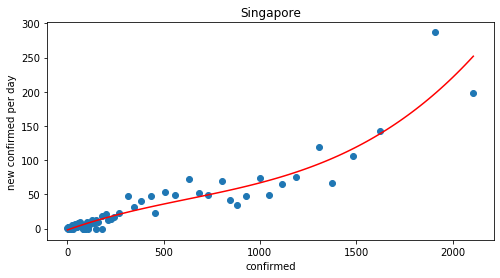

discharged:  499
deaths:  7
%:  1.402805611222445


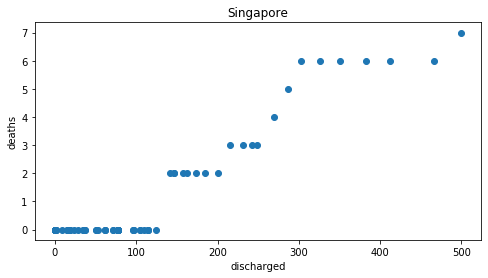

      date  confirmed  deaths  recovered
 2020-4-10     496535   18586      28790
new  confirmed
   35098.0


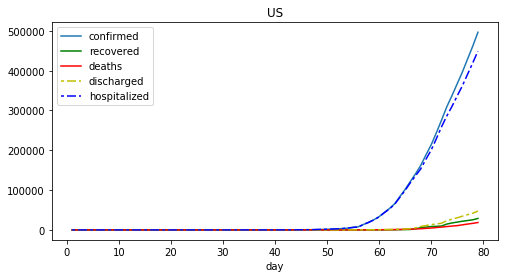

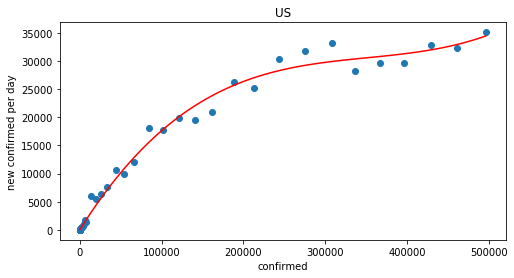

discharged:  47376
deaths:  18586
%:  39.230834177642684


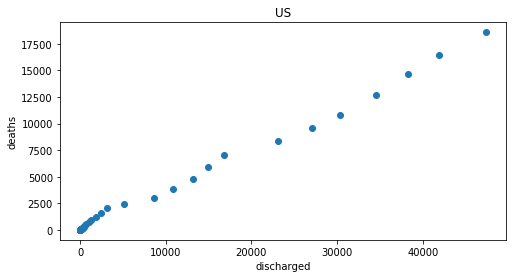

      date  confirmed  deaths  recovered
 2020-4-10      82941    3340      77791
new  confirmed
      58.0


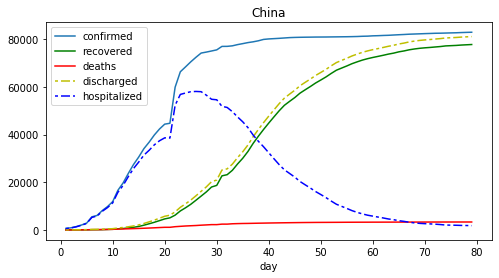

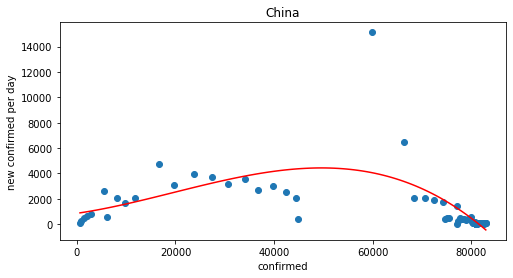

discharged:  81131
deaths:  3340
%:  4.116798757564926


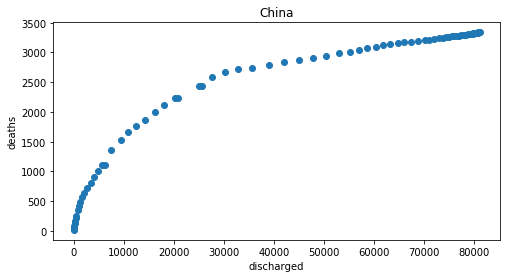

      date  confirmed  deaths  recovered
 2020-4-10     147577   18849      30455
new  confirmed
    3951.0


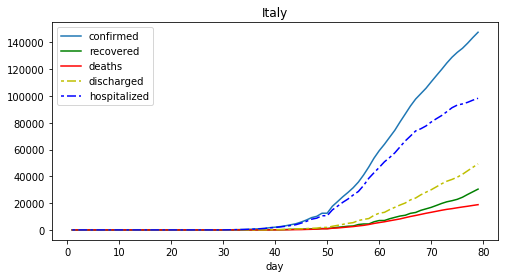

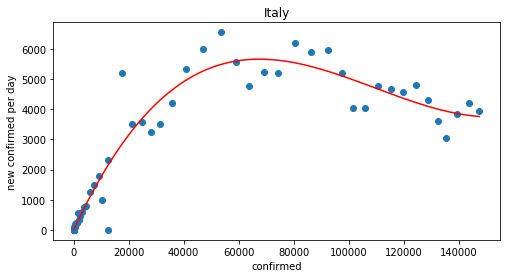

discharged:  49304
deaths:  18849
%:  38.23016388122667


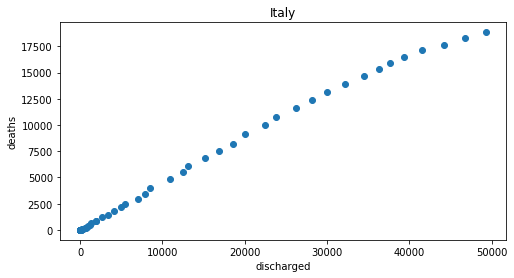

      date  confirmed  deaths  recovered
 2020-4-10     158273   16081      55668
new  confirmed
    5051.0


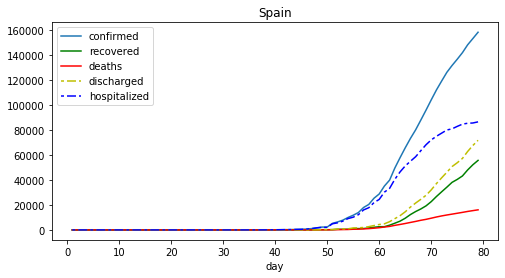

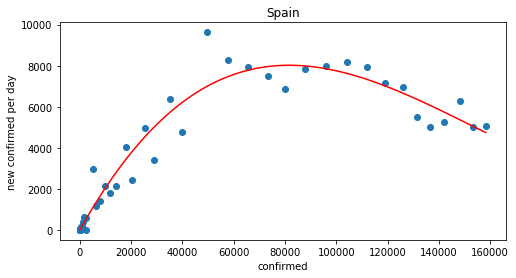

discharged:  71749
deaths:  16081
%:  22.41285592830562


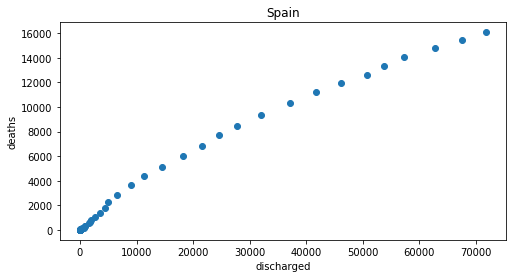

In [4]:
for c in ['Thailand','Singapore','US','China','Italy','Spain']:
    plot_country(c)
